# PISA Data Exploration
## by Yueh-Han Chen

## Investigation Overview

> Are there differences in final weight based on gender, parents' educational backgrounds, or student attitudes, etc?

## Dataset Overview

> PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school. 
Around 510,000 students in 65 [economies](http://www.oecd.org/pisa/aboutpisa/pisa-2012-participants.htm) took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [24]:
# load in the dataset into a pandas dataframe
pisa_df = pd.read_csv('pisa2012.csv', encoding='latin-1')

In [25]:
# rename the column names that I want to investigate to be undertandable

pisa_df.rename(columns={'W_FSTUWT':'final_weight','ST04Q01':'gender', 'ST14Q01':"mothers_had_studied_in_college",
                        'ST18Q01':"fathers_had_studied_in_college",
                        'IC01Q04':'have_internet', 'ST88Q01':'negative_attitude_towards_school',
                        'OUTHOURS': 'Out_of_School_Study_Time'}, inplace=True)

In [26]:
#Combine the original two columns of fathers_had_studied_in_college and mothers_had_studied_in_college 
#to a new column called "parents_had_studied_in_college" includes values of 'no','dad only','mom only','both'

pisa_df['parents_had_studied_in_college'] = None
mom_yes_list = list(pisa_df.query("mothers_had_studied_in_college == 'Yes'").index)
mom_no_list = list(pisa_df.query("mothers_had_studied_in_college == 'No'").index)
dad_yes_list = list(pisa_df.query("fathers_had_studied_in_college == 'Yes'").index)
dad_no_list = list(pisa_df.query("fathers_had_studied_in_college == 'No'").index)
both_yes_list = list(set(mom_yes_list).intersection(dad_yes_list)) 
both_no_list = list(set(mom_no_list).intersection(dad_no_list)) 

for i in mom_yes_list:
    pisa_df[i:i+1]['parents_had_studied_in_college'] = 'mom only'
for i in dad_yes_list:
    pisa_df[i:i+1]['parents_had_studied_in_college'] = 'dad only'
for i in both_yes_list:
    pisa_df[i:i+1]['parents_had_studied_in_college'] = 'both'
for i in both_no_list:
    pisa_df[i:i+1]['parents_had_studied_in_college'] = 'no'

In [6]:
# create frequently used funstion
def desc(title =None, xscale=None, yscale=None, xlabel=None, ylabel=None, xlim=None, ylim=None, xticks=None, yticks=None):
    if title:
        plt.title(title)
    if xscale:
        plt.xscale(xscale);
    if yscale:
        plt.yscale(yscale);
    if xlabel:
        plt.xlabel(xlabel);
    if ylabel:
        plt.ylabel(ylabel);
    if xlim:
        plt.xlim(xlim);
    if ylim:
        plt.ylim(ylim);
    if xticks:
        plt.xticks(xticks, xticks);
    if yticks:
        plt.yticks(yticks, yticks);
        

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Visualization 1: Final weight by whether students have internet

> Students who use internet tend to get average 11 final weights lower than those who do not use or do not have internet.

In [27]:
pisa_df.groupby('have_internet')['final_weight'].mean().sort_values(ascending=True) 

have_internet
Yes, and I use it          29.510703
Yes, but I dont use it    41.054790
No                         46.538173
Name: final_weight, dtype: float64

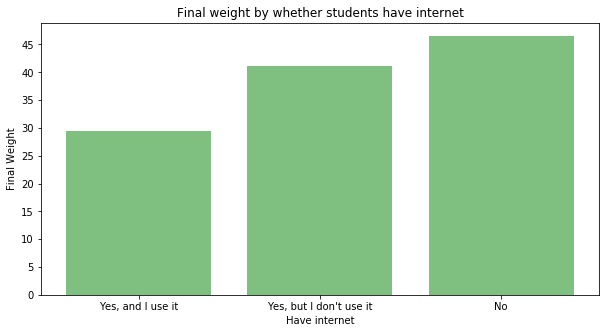

In [28]:
# Visuaize 'Final weight by whether students have internet'
plt.figure(figsize=(10,5))
locations = [1, 2, 3]
labels =  ['Yes, and I use it',"Yes, but I don't use it", 'No']
meanlist = pisa_df.groupby('have_internet')['final_weight'].mean().sort_values(ascending=True)  
plt.bar(locations, meanlist, tick_label=labels, color='g',alpha = 0.5)
desc(title='Final weight by whether students have internet',xlabel='Have internet', ylabel='Final Weight', yticks=range(0,50,5))

## Visualization 2: Average final weight by students' attitude towards school

> Students with strongly positive attitude towards school got average 4 final weight higher than those students with negative attitude.

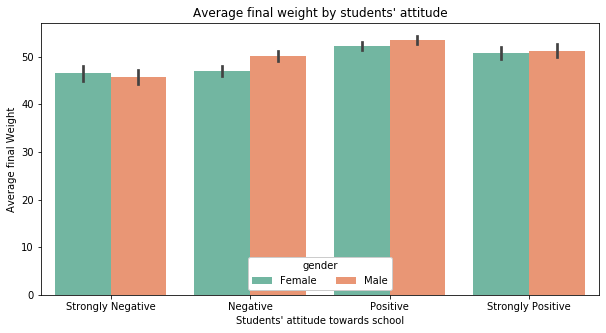

In [29]:
# Visualize "Average final weight by students' attitude"
plt.figure(figsize=(10,5))
pisa_df.negative_attitude_towards_school = pisa_df.negative_attitude_towards_school.map({'Strongly agree':'Strongly Negative','Agree':'Negative','Disagree':'Positive','Strongly disagree':'Strongly Positive'})
ax = sb.barplot(data = pisa_df, x = 'negative_attitude_towards_school', y = 'final_weight', hue = 'gender',
               order = ['Strongly Negative','Negative','Positive','Strongly Positive'], palette = 'Set2')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'gender')
desc(title = "Average final weight by students' attitude", ylabel="Average final Weight", xlabel="Students' attitude towards school")

## Visualization 3: Average final weight by time being spent on studying per week out of school 

> Students typically got higher final weigts when they spent more time studying out of school, but when they studied beyond 70 hours, their final weight started to decrease. Students with 70 hours study time out of school got the highest average final weight.

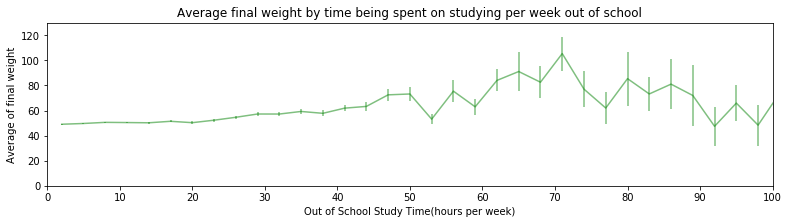

In [30]:
# Visualize 'Average final weight by time being spent on studying per week out of school'
plt.figure(figsize=(13,3))
bin_size = 3
xbin_edges = np.arange(0.5, pisa_df['Out_of_School_Study_Time'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]
data_xbins = pd.cut(pisa_df['Out_of_School_Study_Time'], xbin_edges, right = False, include_lowest = True)
y_means = pisa_df['final_weight'].groupby(data_xbins).mean()
y_sems = pisa_df['final_weight'].groupby(data_xbins).sem()  #std
plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems, color='g', alpha=0.5)
desc(title='Average final weight by time being spent on studying per week out of school',xticks=range(0,110,10), xlim=(0,100), xlabel='Out of School Study Time(hours per week)',ylabel='Average of final weight', ylim=(0,130))

## Visualization 4: Average final weight by parents' education and students' attitude towards school

> In terms of whether their parents had studied in college affect their final weight, I found that only mom had studied in college tend to lead their kids got 10 final weight higher than only dad, and 11 final weight higher than both, and 3 final weight higher than none.

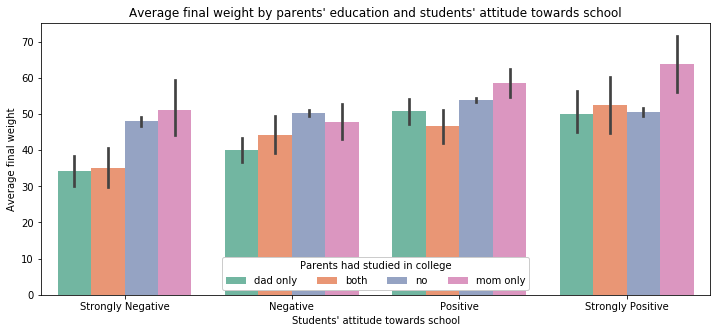

In [31]:
# Visualize "Average final weight by parents' education and students' attitude towards school"
plt.figure(figsize=(12,5))
ax = sb.barplot(data = pisa_df, x = 'negative_attitude_towards_school', y = 'final_weight', hue = 'parents_had_studied_in_college', palette='Set2',
               order = ['Strongly Negative','Negative','Positive','Strongly Positive'], hue_order=['dad only', 'both', 'no', 'mom only'])
ax.legend(loc = 8, ncol = 4, framealpha = 1, title = 'Parents had studied in college')
desc(title="Average final weight by parents' education and students' attitude towards school", ylabel='Average final weight', xlabel="Students' attitude towards school");

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert PISA_slide.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!